In [ ]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Размер мини-выборки
batch_size = 128
# Количество классов изображений
nb_classes = 10
# Количество эпох для обучения
nb_epoch = 25
# Размер изображений
img_rows, img_cols = 32, 32
# Количество каналов в изображении: RGB
img_channels = 3
# Названия классов из набора данных CIFAR-10
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(y_train[100][0])

8


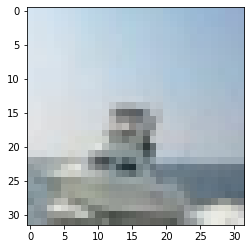

Номер класса: [8]
Тип объекта: корабль


In [ ]:
n = 100


plt.imshow(X_train[n])
plt.show()
print("Номер класса:", y_train[n])
print("Тип объекта:", classes[y_train[n][0]])

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(Y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [ ]:
# Создаем последовательную модель
model = Sequential()
# Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same',
                        input_shape=(32, 32, 3), activation='relu'))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))

# Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), activation='relu'))
# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.1,
              shuffle=True,
              verbose=2)

Epoch 1/25
352/352 - 4s - loss: 1.6283 - accuracy: 0.4043 - val_loss: 1.2444 - val_accuracy: 0.5548
Epoch 2/25
352/352 - 3s - loss: 1.2169 - accuracy: 0.5658 - val_loss: 1.0054 - val_accuracy: 0.6458
Epoch 3/25
352/352 - 3s - loss: 1.0420 - accuracy: 0.6305 - val_loss: 0.8842 - val_accuracy: 0.6922
Epoch 4/25
352/352 - 3s - loss: 0.9348 - accuracy: 0.6709 - val_loss: 0.8004 - val_accuracy: 0.7254
Epoch 5/25
352/352 - 3s - loss: 0.8593 - accuracy: 0.6959 - val_loss: 0.8016 - val_accuracy: 0.7208
Epoch 6/25
352/352 - 3s - loss: 0.8025 - accuracy: 0.7183 - val_loss: 0.7380 - val_accuracy: 0.7458
Epoch 7/25
352/352 - 3s - loss: 0.7478 - accuracy: 0.7376 - val_loss: 0.6787 - val_accuracy: 0.7658
Epoch 8/25
352/352 - 3s - loss: 0.7088 - accuracy: 0.7494 - val_loss: 0.6858 - val_accuracy: 0.7674
Epoch 9/25
352/352 - 3s - loss: 0.6717 - accuracy: 0.7631 - val_loss: 0.6674 - val_accuracy: 0.7716
Epoch 10/25
352/352 - 3s - loss: 0.6442 - accuracy: 0.7738 - val_loss: 0.6489 - val_accuracy: 0.7768

In [ ]:
model_json = model.to_json()
json_file = open("cifar10_model.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("cifar10_model.h5")

In [ ]:
!ls

cifar10_model.h5  cifar10_model.json  sample_data


In [ ]:
from google.colab import files

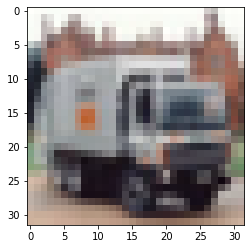

In [ ]:
index=11
plt.imshow((X_test[index]))
plt.show()

In [ ]:
x = X_test[index]
x = np.expand_dims(x, axis=0)

In [ ]:
prediction = model.predict(x)

In [ ]:
print(prediction)

[[4.3204338e-15 9.1941416e-08 2.0941400e-23 1.4150276e-22 1.1767501e-25
  3.5741689e-27 4.5264728e-26 1.8846588e-23 2.0921864e-13 9.9999988e-01]]


In [ ]:
prediction = np.argmax(prediction)
print(classes[prediction])

грузовик


In [ ]:
print(classes[y_test[index][0]])

грузовик


In [ ]:
from google.colab import files

files.upload()

Saving bembi2.jpg to bembi2.jpg


{'bembi2.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x10\x12\x10\x13\x11\x12\x12\x16\x15\x15\x15\x15\x0f\x15\x10\x10\x10\x12\x15\x0f\x10\x15\x15\x15\x15\x16\x16\x15\x15\x15\x15\x18\x1d( \x18\x1a%\x1b\x16\x15!1!%5+...\x17\x1f383-7(-.+\x01\n\n\n\x0e\r\x0e\x1a\x10\x10\x1a-\x1f\x1d\x1e---------------------------++----+-----+----------\xff\xc0\x00\x11\x08\x00\xa8\x01,\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x00\x01\x02\x04\x05\x06\x07\x08\xff\xc4\x00@\x10\x00\x01\x04\x00\x04\x03\x06\x03\x05\x05\x07\x04\x03\x00\x00\x00\x01\x00\x02\x03\x11\x04\x12!1\x05AQ\x06\x13"aq\x81\x07\x91\xa1\x142\xb1\xc1\xf0Bb\xb2\xd1\xf1\x15#Rr\x82\xa2\xe1\x163s\x92$%C\xff\xc4\x00\x19\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xc4\x00#\x11\x01\x01\x00\x02\x02\x02\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x01\x02\x11\x1

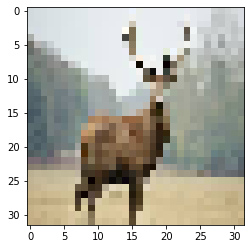

In [ ]:
img_path = 'bembi2.jpg'
img = image.load_img(img_path, target_size=(32, 32))
plt.imshow(img)
plt.show()

In [ ]:
x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

In [ ]:
prediction = model.predict(x)
prediction = np.argmax(prediction)
print(classes[prediction])

олень
